Sergi Busquets (https://github.com/seeergiii)

# AB Testing: Server Efficiency Analysis

In the bustling IT department of a corporate office, they faced the task of assessing the performance of their web servers efficiently. With a methodical approach, they decided to measure the wait times between client requests and server responses. In a routine task that mirrored their daily operations, they recorded the **wait times in milliseconds for two servers**, TA and TB, over a fixed number of requests. The data points collected were organized in a file named 'ActR08TATB.csv', ready for analysis.

**Data Source:** Universitat Oberta de Catalunya (UOC)

## 1️⃣ Test whether we can consider server A to be less efficient than server B, using a significance level at α = 0.01.

### 1.1. Data overview

Let's first import the necessary libraries for data manipulation, statistics, and visualization. We wiil read the raw data from the CSV file named ActR08TATB.csv using Pandas.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from math import sqrt
import random

from scipy.stats import norm


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read .csv file
data = pd.read_csv('raw_data/ActR08TATB.csv', delimiter=';')
data.head(5)

,TA,TB
0,9.67,6.45
1,9.62,9.64
2,9.50,8.53
3,10.88,9.20
4,8.94,4.55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TA      50 non-null     float64
 1   TB      50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


We create a boxplot to visually compare the response times of both servers. The boxplot shows the median, quartiles, and outliers for each server.

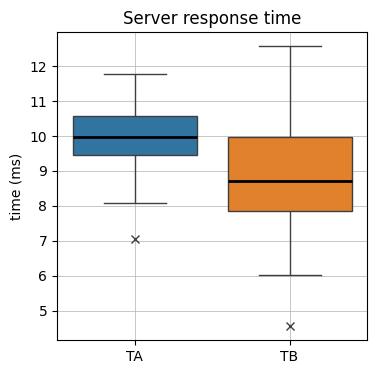

In [5]:
# Boxplots for response times on each server
plt.figure(figsize=(4, 4))
ax = sns.boxplot(data=data,
                 flierprops={"marker": "x"},
                 medianprops={"color": "black", "linewidth": 2})
plt.grid(lw=0.5)
plt.title('Server response time')
plt.ylabel('time (ms)')
plt.show()

We can see how the server response time is faster on requests made to server A compared to the ones made to server B. The median response time for server A is around 10 ms, while the median response time for server B is about 8.5 ms.

The spread of the response times is larger for server B, as the whiskers extend from 6 ms to over 12 ms, while the whiskers for server A extend from 8 ms to just below 12 ms. This shows that there is a wider range of response times on server B than on server A.

There are only two outliers detected for server A, and one outlier for server B.

### 1.2 Hypothesis statement

We aim to **contrast the mean response time of the two servers**, under the assumption that greater response times indicate lesser efficiency. Therefore, we will examine whether the mean response time of server A surpasses that of server B (**one-sided test**).

### 1.3 Test statistic:

$$
H_{0}: \bar{x}_{A} - \bar{x} _{B}= 0
$$

$$
H_{a}: \bar{x}_{A} - \bar{x} _{B}>  0
$$

Although we cannot presume normal distribution within the populations, given the substantial sample sizes for both servers exceeding 30, and according to the Central Limit Theorem, we will be using a **Z-test**.

$$
Z = \frac{\bar{x}_{A} - \bar{x}_{B}}{\sqrt{\frac{\bar{s}_{A}^2}{n_{A}} + \frac{\bar{s}_{B}^2}{n_{B}}}}
$$

In [6]:
# Compute the Z test statistic
mean_ta = data.TA.mean()
mean_tb = data.TB.mean()

variance_ta = data.TA.var()
variance_tb = data.TB.var()

z = (mean_ta - mean_tb) / (sqrt((variance_ta/len(data.TA) + variance_tb/len(data.TB))))
z

3.7134080154690747

### 1.4 P-value:

With the test statistic computed, we proceed to obtain the p-value by evaluating the Cumulative Distribution Function of a standard normal distribution, denoted as N(0,1). Since we are conducting a right-tailed test, and the cumulative distribution function yields the area to the left of the test statistic on the distribution curve, we will subtract the computed value from 1.

In [7]:
# Compute the p-value from the CDF of a normal distrbution N(0,1)
1-norm.cdf(z)

0.0001022434048687515

We observe a p-value close to 0, indicating that there is a very low frequency with which the chance model produces a result more extreme than the observed result. Since this value is smaller than our chosen significance level (representing our tolerance for committing a Type I error), we reject the Null Hypothesis that the **response time on server A is significantly higher (indicating lesser efficiency) compared to server B**.

## 2️⃣ Find a 99% confidence interval for the wait time difference between the two servers, assuming equal variances.

The confidence interval will be defined as follows:
$$
(\bar{x_{A} }-\bar{x_{B}})\pm Z_{α/2} S_{\bar{x_{A} }-\bar{x_{B}}}
$$

The critical value z, for the given confidence interval is obtained using the Probability Density Function.

In [8]:
# Compute the Z test statistic from the PDF of a normal distribution N(0,1)
alpha = 0.99
z = norm.ppf((1-alpha)/2)
z

-2.5758293035489004

Next, we can calculate the margin of the confidence interval.

In [9]:
# Compute the margin
m = z * sqrt((variance_ta/len(data.TA))+(variance_tb/len(data.TB)))
m

-0.7159921549281528

Once we get the margin, we can define the top and bottom values of the confidence interval.

In [10]:
# Bottom limit
bottom = (mean_ta-mean_tb) + m
bottom

0.3162078450718485

In [11]:
# Top limit
top = (mean_ta-mean_tb) - m
top

1.7481921549281543

Finally, we  plot the confidence interval and the statistical significance boundary.

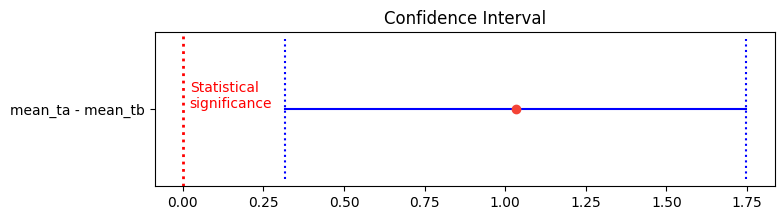

In [12]:
# Plot confidence interval
def plot_confidence_interval(x, top, central, bottom, color='blue', horizontal_line_width=0.25):
    left_w = x - horizontal_line_width / 4
    right_w = x + horizontal_line_width / 4
    plt.plot([top, bottom], [x, x], color=color)
    plt.plot([top, top], [left_w, right_w], color=color, linestyle='dotted')
    plt.plot([bottom, bottom], [left_w, right_w], color=color, linestyle='dotted')
    plt.plot(central, x, 'o', color='#f44336')

plt.figure(figsize=(8, 2))
plt.title('Confidence Interval')
plt.yticks([1], ['mean_ta - mean_tb'])
plt.axvline(x=0, color='red', linestyle='dotted', lw=2)
plt.annotate('Statistical\nsignificance', xy=(0, 1), xytext=(5, 1), textcoords='offset points', color='red')
plot_confidence_interval(1, top, (mean_ta - mean_tb), bottom)
plt.show()

The point estimate is represented as a ret dot within the confidence interval. We can observe that the value 0 does not fall within the interval. This indicates that, at the specified confidence level, there is **enough statistical evidence to assert a difference in response times between the two servers.**

## 3️⃣ The company has considered that a wait time is tolerated if it remains under 9 milliseconds. Can we say that the proportion of requests with tolerated wait times is different for the two servers, using a confidence level at α = 0.05?

Before conducting any statistical tests, we generate two new binary variables that define whether a given response time is tolerated (0) or not tolerable (1).

In [13]:
# Create binary variables
tolerated_time = lambda x: 1 if x < 9 else 0
data['TA_tolerated'] = data['TA'].apply(tolerated_time)
data['TB_tolerated'] = data['TB'].apply(tolerated_time)

data.head(5)

,TA,TB,TA_tolerated,TB_tolerated
0,9.67,6.45,0,1
1,9.62,9.64,0,0
2,9.50,8.53,0,1
3,10.88,9.20,0,0
4,8.94,4.55,1,1


### 3.1 Hypothesis statement

In this scenario, we need to perform a two-tailed test on the proportion of non-tolerated request times.

$$
H_{0}: p_{A} - p_{B}= 0
$$

$$
H_{a}: p_{A} - p_{B}\neq  0
$$

Both samples originate from populations that follow a Binomial distribution. Because our sample sizes are big enough, our test statistic can be approximated as follows:

$$
\hat{p_{pool}} = \frac{n_{A}\hat{p_{A}} + n_{B}\hat{p_{B}}}{n_{A}+n_{B}} 
$$

In [22]:
pa = len(data[data['TA_tolerated'] == 1]) / len(data.TA_tolerated)
pb = len(data[data['TB_tolerated'] == 1]) / len(data.TB_tolerated)

print(f'Proportion for server A: {pa}')
print(f'Proportion for server B: {pb}')

Proportion for server A: 0.12
Proportion for server B: 0.62


In [23]:
p_pool = (len(data.TA_tolerated) * pa + len(data.TB_tolerated) * pb) / (len(data.TA_tolerated) + len(data.TB_tolerated))

print(f'Pooled proportion: {p_pool}')

Pooled proportion: 0.37


$$
z = \frac{\hat{p_{A}} - \hat{p_{B}}}{\sqrt{\hat{p_{pool}}(1-\hat{p_{pool}}) (\frac{1}{n_{A} } + \frac{1}{n_{B} } )  }}
$$


In [16]:
z = (pa - pb) / (sqrt(p_pool * (1-p_pool) * (1/len(data.TA_tolerated) + 1/len(data.TB_tolerated))))
z

-5.178081383343334

### 3.2 P-value:

With the test statistic computed, we proceed to obtain the p-value by evaluating the Cumulative Distribution Function of a standard normal distribution, denoted as N(0,1). Since we are conducting a two-sided test, and the cumulative distribution function yields the area to the left of the test statistic on the distribution curve, we will be multiplying by 2 the computed value.

In [24]:
2*norm.cdf(z)

2.2417943998316116e-07

We observe a p-value close to 0, indicating that there is a very low frequency with which the chance model produces a result more extreme than the observed result. Since this value is smaller than our chosen significance level (representing our tolerance for committing a Type I error), we reject the Null Hypothesis that states that **there is not statistically difference between the proportion of non-tolerated time requests between servers A and B**.

### 3.3 🎟️ BONUS: A/B Testing using a Resampling Procedure

We can also test whether the difference in non-tolerated time requests between servers A and B **falls within the range of chance variation** using a **resampling procedure**. The resampling procedure will be executed as follows:

1. Combine the binary variables 'TA_tolerated' and 'TB_tolerated' into a single list.
2. Shuffle and draw a resample of size 50 (equivalent to the total observations for server A), recording the count of '1's.
3. Record the count of '1's in the remaining observations that were not selected.
4. Calculate the difference in proportions of '1's.
5. Repeat steps 2-4 for a set number of times (1,000).
6. Check how frequently the difference in proportions exceeded the observed difference.

In [18]:
# Permutation
def perm_fun(x: pd.DataFrame, nA: int, nB: int) -> pd.DataFrame:
    'Returns the result of combining and shuffling 2 binary variables from a dataframe'
    n = nA + nB
    idx_B = list(random.sample(range(n), nB))
    idx_A = list(set(range(n)) - set(idx_B))
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Observed difference: -50.0%


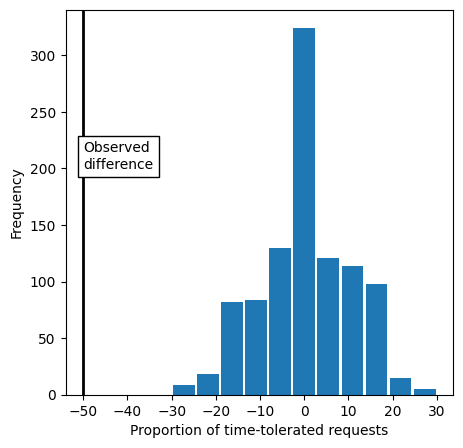

In [36]:
# Resampling procedure
obs_pct_diff = (pa - pb) * 100
print(f'Observed difference: {obs_pct_diff}%')

tolerated = [0] * (len(data[data['TA_tolerated'] == 0]) + len(data[data['TB_tolerated'] == 0]))
tolerated.extend([1] * (len(data[data['TA_tolerated'] == 1]) + len(data[data['TB_tolerated'] == 1])))
tolerated = pd.Series(tolerated)

perm_diffs = [100 * perm_fun(tolerated, int(len(data.TA_tolerated)), int(len(data.TB_tolerated)))
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(obs_pct_diff, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Proportion of time-tolerated requests')
ax.set_ylabel('Frequency')
plt.show()

Examining the histogram, we can see that the observed difference in proportions exceeds the range of observed differences. This suggests that this **difference is not withint the range of chance variation**.

In order to get a more precise estimate of statistical significance, we can estimate a p-value for our permutation test. The p-value will measure the proportion of times that the test has produced a difference equal to or greater than the observed difference.

In [40]:
np.mean([diff <= obs_pct_diff for diff in perm_diffs])

0.0

The p-value is 0.0, which means that **we would not expect to achieve a result as extreme as this, or a more extreme result, by random chance at all**.